# Data cleaning Project1: Dati Luca and Miori Gloria

## 1) Load packages and data

In [2163]:
# Importing packages

import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv('churn_data_before_processing.csv', index_col= 0)

## 2) First look at the data

In this part we look at the data as a whole to understand the nature of the data, find information about the type of data we are working with and what each field/feature in the data means.
We look at the size of the dataset, if there are duplicated values and NaN values.


The dataset has 10150 rows and 14 columns.<br>
Not all columns will be significant for the analysis.<br>
RowNumber is not of interest and can be eliminated.<br>
Some insights on the non-trivial columns:<br>
    $\ CustomerId is a unique identifier and can be used to see if there are duplicated data in the dataset.<br>
    - CreditScore is a number between 300–850 that depicts a consumer's creditworthiness.<br>
    - Tenure means the length of time a customer has been with the bank in years<br>
    - Balance is the amount of money held in a bank account at a given moment<br>
    - Estimated salary is the estimated salary per year (probably in Euro based on the Geography column)<br>
    - Exited says if the customer left the bank or not. This will probably be the outcome we will want from a model<br>

In [2164]:
# First look at the data

df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1612,1613,15649121,Pinto,665.0,France,Male,52.0,3.0,0.00,1.0,1.0,0.0,116137.01,1
8161,8162,15615352,Ebelechukwu,588.0,France,Male,31.0,4.0,99607.37,2.0,0.0,1.0,35877.03,0
2976,2977,15667265,Cavenagh,729.0,France,Male,39.0,4.0,121404.64,1.0,1.0,1.0,159618.17,0
7300,7301,15788224,Sanderson,669.0,Germany,Male,45.0,1.0,123949.75,1.0,0.0,0.0,110881.56,0
7320,7321,15778142,Shih,850.0,Germany,Female,31.0,1.0,NaN,2.0,1.0,1.0,4466.21,0
4120,4121,15610105,Shen,666.0,Germany,Female,21.0,1.0,121827.43,2.0,1.0,1.0,99818.31,0
2481,2482,15764105,Milne,475.0,France,Female,57.0,1.0,0.00,2.0,1.0,0.0,89248.99,0
4286,4287,15694404,Eberegbulam,781.0,France,Female,42.0,3.0,156555.54,1.0,1.0,1.0,175674.01,0
4854,4855,15574071,Muravyova,706.0,Germany,Male,23.0,2.0,93301.97,2.0,0.0,1.0,127187.04,0
6882,6883,15609160,Marsden,586.0,France,Male,32.0,1.0,0.00,2.0,0.0,0.0,31635.99,0


In [2165]:
df.shape, df.columns

((10150, 14),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object'))

The dataset has 10150 rows and 14 columns.<br>
    Not all columns will be significant for the analysis.<br>
    RowNumber is not of interest and can be eliminated.<br>
    Some insights on the non-trivial columns:<br>
        - CustomerId is a unique identifier and can be used to see if there are duplicated data in the dataset.<br>
        - CreditScore is a number between 300–850 that depicts a consumer's creditworthiness.<br>
        - Tenure means the length of time a customer has been with the bank<br>
        - Balance is the amount of money held in a bank account at a given moment<br>
        - Estimated salary is the estimated salary per year (probably in Euro based on the Geography column)<br>
        - Exited says if the customer left the bank or not. This will probably be the outcome we will want from a model<br>

In [2166]:
df.info() # general overview of the data and type of variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10150 entries, 0 to 8
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10150 non-null  int64  
 1   CustomerId       10150 non-null  int64  
 2   Surname          10056 non-null  object 
 3   CreditScore      10132 non-null  float64
 4   Geography        9954 non-null   object 
 5   Gender           9867 non-null   object 
 6   Age              9879 non-null   float64
 7   Tenure           10070 non-null  float64
 8   Balance          9994 non-null   float64
 9   NumOfProducts    9862 non-null   float64
 10  HasCrCard        10067 non-null  float64
 11  IsActiveMember   10063 non-null  float64
 12  EstimatedSalary  10106 non-null  float64
 13  Exited           10150 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.2+ MB


In [2167]:
# Changing column names to work more easily

df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [2168]:
# Droping useless column rownumber

df = df.drop('rownumber', axis = 1)

##  a) Eliminating Duplicates

In [2169]:
df.duplicated().sum()

104

In [2170]:
df[df.duplicated(keep='first')]

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
6481,15664752,Jack,606.0,Germany,Male,39.0,8.0,136000.45,2.0,1.0,0.0,31708.53,0
4317,15592194,Metcalf,492.0,France,Female,28.0,9.0,0.00,2.0,1.0,0.0,95957.09,0
6295,15621550,Hung,535.0,Spain,Female,50.0,1.0,140292.58,3.0,0.0,0.0,69531.22,1
9488,15659355,McKenzie,671.0,Spain,Male,32.0,6.0,123912.78,2.0,1.0,1.0,146636.44,0
6493,15723671,Lucciano,661.0,France,Male,35.0,9.0,100107.99,1.0,1.0,0.0,83949.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,15806249,Kerr,671.0,Spain,Female,31.0,4.0,0.00,2.0,0.0,1.0,79270.02,0
3612,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0


In [2171]:
df.drop_duplicates(subset= ["customerid"], inplace=True)

In [2172]:
print(df.duplicated().any())
print(df.shape)

False
(10000, 13)


## b) Checking for NaN values

In [2173]:
df.isnull().any()

customerid         False
surname             True
creditscore         True
geography           True
gender              True
age                 True
tenure              True
balance             True
numofproducts       True
hascrcard           True
isactivemember      True
estimatedsalary     True
exited             False
dtype: bool

There are missing values in every columns except CustomerID and Exited and we will analyse all of them separately

In [2174]:
df.isna().sum() # counting NaN for each column

customerid           0
surname             92
creditscore         18
geography          195
gender             278
age                261
tenure              78
balance            150
numofproducts      286
hascrcard           80
isactivemember      87
estimatedsalary     43
exited               0
dtype: int64

In [2175]:
# evaluating the % of NaN for each column
print('Percentage of Nan for each column'"\n",(df.isna().sum()/df.customerid.count()*100).round(1))

Percentage of Nan for each column
 customerid         0.0
surname            0.9
creditscore        0.2
geography          2.0
gender             2.8
age                2.6
tenure             0.8
balance            1.5
numofproducts      2.9
hascrcard          0.8
isactivemember     0.9
estimatedsalary    0.4
exited             0.0
dtype: float64


All features has a small % of NaN

In [2176]:
# general view of the variables statistical information

df.describe().round()

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.0,9982.0,9739.0,9922.0,9850.0,9714.0,9920.0,9913.0,9957.0,10000.0
mean,15690941.0,651.0,39.0,5.0,76723.0,2.0,1.0,1.0,100117.0,0.0
std,71936.0,100.0,11.0,3.0,63728.0,1.0,0.0,0.0,57497.0,0.0
min,15565701.0,350.0,-49.0,-5.0,0.0,-2.0,0.0,0.0,12.0,0.0
25%,15628528.0,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51100.0,0.0
50%,15690738.0,652.0,37.0,5.0,97246.0,1.0,1.0,1.0,100240.0,0.0
75%,15753234.0,718.0,44.0,7.0,127641.0,2.0,1.0,1.0,149400.0,0.0
max,15815690.0,2924.0,92.0,32.0,1036826.0,11.0,1.0,1.0,199992.0,1.0


There are some values in some columns that makes no sense (i.e. Negative age, tenure,...) but we will analyse each feature separately afterwards in the Uni-variate Analysis

In [2177]:
#pd.set_option('display.max_rows', None)

In [2178]:
#pd.reset_option("display.max_rows")

## Missing Values and Outliers Exploration by column

- `surname`
- `creditscore`
- `geography`
- `gender`
- `age`
- `tenure`
- `balance`
- `numofproducts`
- `hascrcard`
- `isactivemember`
- `estimatedsalary    `

## SURNAME COLUMN

In [2179]:
# Cheking for type and missing values

print(type(df.surname[0]))
print(df.surname.isna().any())
print(df.surname.isna().sum())

<class 'str'>
True
92


In [2180]:
# Creating a new category for missing values: surname will not be important feature in a model (feature will be disregarded), so we can fill in information with 'No information avilable'

df.surname.fillna('No information avilable', inplace= True)
print(df.surname.isna().any())

assert df.surname.isna().any() == False
assert df.surname.count() == len(df) # assert we fixed all NaN rows

False


In [2181]:
#checking for other types of Na's

df[df.surname.isin(["Null", "null", "nan"])]

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


In [2182]:
# Frequency Table
print(df.surname.count())
df.surname.value_counts()

10000


No information avilable    92
Smith                      32
Martin                     29
Scott                      29
Walker                     28
                           ..
Howarde                     1
Creswell                    1
Galkina                     1
Redding                     1
Deleon                      1
Name: surname, Length: 2926, dtype: int64

## CREDIT SCORE

In [2183]:
# Checking for Type and Missing values

print(type(df.creditscore[0])) 
print(df.creditscore.isna().any())
print(df.creditscore.isna().sum())

<class 'numpy.float64'>
True
18


In [2184]:
# Column description

print(df.creditscore.describe()) # i removed the median calculation/printing for all features since the 50 percentile is the median


count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: creditscore, dtype: float64


<AxesSubplot:>

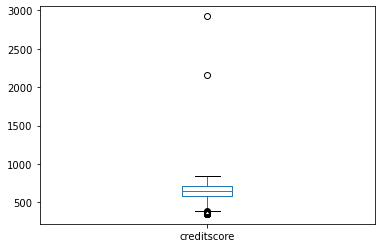

In [2185]:
#identifiying the outliers

df.creditscore.plot( kind = 'box')

In [2186]:
# CreditScore is a number between 300–850:
# values bigger than 850 are outliers to be replaced
# saving a version of the Column without the outliers

CS_cleaned = df[df.creditscore < 850]["creditscore"].copy()
CS_cleaned.describe()

count    9749.000000
mean      645.796697
std        92.706084
min       350.000000
25%       582.000000
50%       649.000000
75%       712.000000
max       849.000000
Name: creditscore, dtype: float64

<AxesSubplot:>

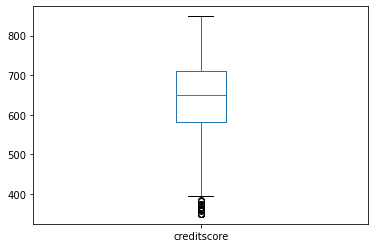

In [2187]:
# Box plot without the outliers

CS_cleaned.plot(kind = 'box')

In [2188]:
# Replacing missing values and outliers with Median
# calculating median without outliers

CS_median = CS_cleaned.median()
CS_median

649.0

In [2189]:
df.creditscore.fillna(CS_median, inplace= True)
df.loc[df.creditscore > 850, "creditscore"] = CS_median

In [2190]:
df.creditscore.isna().any()

False

In [2191]:
assert df.creditscore.count() == len(df) # assert we fixed all NaN rows
assert max(df.creditscore) == 850

## Geography Column

In [2192]:
# Checking for Type and missing values and % of missing values
type(df.geography[0]), df.geography.isna().sum(), df.geography.isna().mean()*100

(str, 195, 1.95)

In [2193]:
# Frequency Table, absolute values and %

df.geography.value_counts(dropna =False), df.geography.value_counts(normalize = True, dropna = False)*100

(France     4923
 Germany    2451
 Spain      2431
 NaN         195
 Name: geography, dtype: int64,
 France     49.23
 Germany    24.51
 Spain      24.31
 NaN         1.95
 Name: geography, dtype: float64)

Around 2% of Geography column is NaN.
Since it is a categorical variable we decided to fill the missing value with the Mode

In [2194]:
# Using the mode to fill NaN

df.geography.fillna('France', inplace= True)

In [2195]:
df.geography.value_counts(dropna =False)

France     5118
Germany    2451
Spain      2431
Name: geography, dtype: int64

<AxesSubplot:>

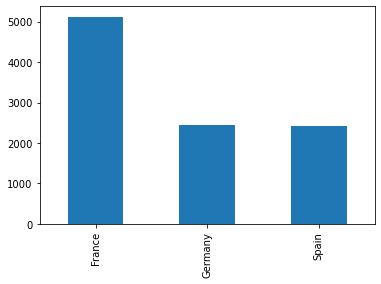

In [2196]:
df.geography.value_counts().plot(kind= 'bar')

In [2197]:
assert df.geography.count() == len(df) #assert we fixed all NaN rows

## Gender Column

In [2198]:
# Checking for type and missing values and % of missing values

type(df.gender[0]), df.gender.isna().sum(), df.gender.isna().mean()*100

(str, 278, 2.78)

In [2199]:
# Frequency Table in %

df.gender.value_counts(dropna = False)/df.gender.count()*100


Male      54.556676
Female    45.443324
NaN        2.859494
Name: gender, dtype: float64

In [2200]:
df.gender.fillna('No gender', inplace= True) # replace NaN values with 'No gender': easier to replace afterwards
df.gender.value_counts(dropna = False)

Male         5304
Female       4418
No gender     278
Name: gender, dtype: int64

For gender we will assign NaN to Male or Female randomly with a uniform discribution since in a normal population male and female should be around 50%-50%

In [2201]:
np.random.seed(1)
rand_n = np.random.randint(0,2,len(df[df.gender == 'No gender']))
gen_val = list()

# creating a list of Male and Female based on random numbers to replace NaN
for i in rand_n:
    if i == 1:
        gen_val.append('Male')
    else:
        gen_val.append('Female')

In [2202]:
# replace NaN with the list of random genders
df.loc[df.gender == 'No gender', "gender"] = gen_val

In [2203]:
df.gender.value_counts(dropna = False), 

(Male      5449
 Female    4551
 Name: gender, dtype: int64,)

<AxesSubplot:>

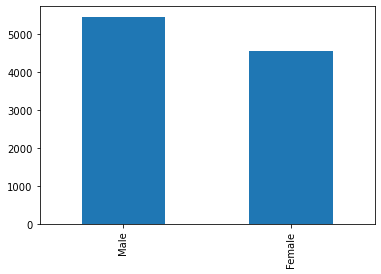

In [2204]:
df.gender.value_counts().plot(kind= 'bar')

In [2205]:
assert df.gender.count() == len(df) # assert we fixed all NaN rows

## Age Column

In [2206]:
# Checking for Type and missing values and % of missing values

type(df.age[0]) , df.age.isna().sum(),  df.age.isna().mean().round(3)*100

(numpy.float64, 261, 2.6)

In [2207]:
# Column Description

print(df.age.describe())

count    9739.000000
mean       38.950816
std        10.560797
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: age, dtype: float64


In [2208]:
# Finding outliers

<AxesSubplot:>

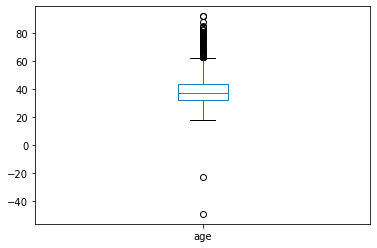

In [2209]:
df.age.plot(kind = 'box')

In [2210]:
# Negative values are meaningless ouliers so they must be replaced, very old customers are outliers but possible (so we will not touch them)
# Calculating median without the outliers

median_age = df[df.age > 0]["age"].median()
median_age

37.0

In [2211]:
# Replacing outliers and missing values with median age

df.age.fillna(median_age, inplace= True)
df.loc[df.age < 0, 'age'] = median_age

In [2212]:
# Asserting that the minimum age is 18 years

#### glomio / I deleted this assert because children under 18 can have a bank account created for them by a parent or created by them with the supervision of an aduld
#  --> see consistency check below when checking age-tenure

In [2213]:
df.age.describe()

count    10000.00000
mean        38.91450
std         10.37114
min         18.00000
25%         32.00000
50%         37.00000
75%         44.00000
max         92.00000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

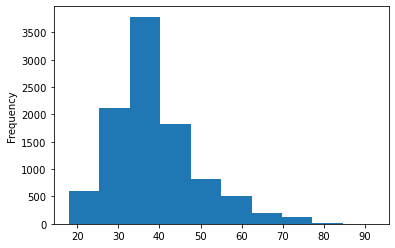

In [2214]:
# visual distribution of the dataset population based on age
df.age.plot(kind= 'hist')

In [2215]:
# Changing the type from float to integer

df['age']  = df.age.astype('int')
type(df.age[0])

numpy.int32

In [2216]:
assert df.age.count() == len(df) # assert we fixed all NaN rows

In [ ]:
np.random.seed(1)
rand_n = np.random.randint(0,2,len(df[df.gender == 'No gender']))
gen_val = list()

# creating a list of Male and Female based on random numbers to replace NaN
for i in rand_n:
    if i == 1:
        gen_val.append('Male')
    else:
        gen_val.append('Female')

## Tenure Column

In [2217]:
# Checking for type and missing values

print(type(df.tenure[0]))
df.tenure.isna().sum()

<class 'numpy.float64'>


78

In [2218]:
# Column description

print(df.tenure.describe())

count    9922.000000
mean        5.014316
std         2.905638
min        -5.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        32.044103
Name: tenure, dtype: float64


<AxesSubplot:>

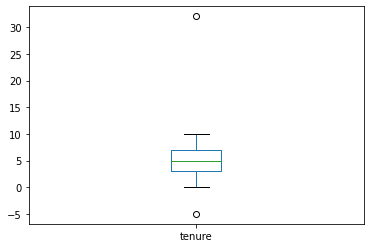

In [2219]:
# Finding outliers 

df.tenure.plot(kind = 'box')

In [2220]:
# checking the outlier with very high tenure
df[df.tenure > 30]

# this tenure value seems to be an error since all tenure value are integers while this one has decimal.
# we will correct it together with the other outliers replacing it with the median

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
5204,15704231,Barrett,430.0,France,Female,33,32.044103,0.0,1.0,1.0,1.0,69759.91,0


In [2221]:
# Outliers are negatives values and the one big not-integer value.
# Calculating median without outliers, step 1: clean the tenure column and save it as a new df

df_tenure_cleaned = df[df.tenure < 30]["tenure"].copy()
df_tenure_cleaned = df_tenure_cleaned[df_tenure_cleaned > 0]

In [2222]:
# step 2: calculate the median of the cleaned column

median_tenure = df_tenure_cleaned.median()
median_tenure

5.0

In [2223]:
# # Outliers are negatives values and the one big not-integer value.
# Replacing NA's and outliers with median

df.loc[df.tenure > 30, 'tenure'] = median_tenure
df.tenure.fillna(median_tenure, inplace= True)
df.loc[df.tenure < 0, 'tenure'] = median_tenure
df.tenure.describe()

count    10000.000000
mean         5.012500
std          2.879891
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

In [2224]:
assert min(df.tenure) == 0 

In [2242]:
# check the consistency between age and tenure:

diff_age_tenure = (df.age-df.tenure)
assert diff_age_tenure.all() > 0

In [2243]:
# final check on tenure distribution and summary

df.tenure.describe()

count    10000.000000
mean         5.012500
std          2.879891
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

<AxesSubplot:>

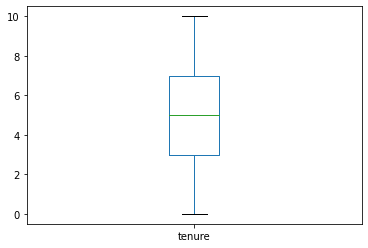

In [2227]:
df.tenure.plot( kind = "box")

<AxesSubplot:ylabel='Frequency'>

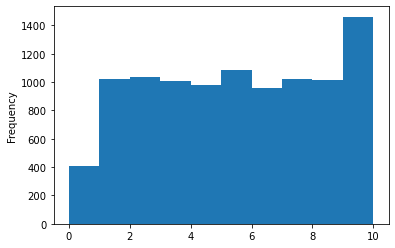

In [2228]:
# visual distribution of the dataset population based on tenure
df.tenure.plot(kind= 'hist')

In [2244]:
assert df.tenure.count() == len(df) # assert we fixed all NaN rows

## Balance Column

In [2229]:
# Cheking for type and missing values and % of missing values

type(df.balance[0]), df.balance.isna().sum(), df.balance.isna().mean()*100

(numpy.float64, 150, 1.5)

In [2246]:
# Describe the column

print(df.balance.describe().round(2))

count       9850.00
mean       76722.67
std        63727.69
min            0.00
25%            0.00
50%        97246.00
75%       127641.42
max      1036826.08
Name: balance, dtype: float64


<AxesSubplot:>

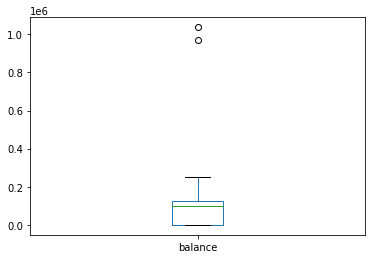

In [2250]:
# Finding Outliers 

df.balance.plot(kind = 'box')

Values bigger than 800 000 are potential ouliers

In [2248]:
# Look up the other variables of the potential outliers

df[df.balance > 0.8e6].round(2)

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2135,15704284,Ekechukwu,736.0,Germany,Male,57,9.0,969780.20,1.0,1.0,0.0,28434.44,1
5464,15795540,Reye,556.0,France,Female,36,2.0,1036826.08,1.0,0.0,1.0,177670.57,0


Seems to have a low salary for such a huge balance

## Number of products Column


In [2233]:
# Cheking for type and outliers

type(df.numofproducts[0]), df.numofproducts.isna().sum()

(numpy.float64, 286)

In [2234]:
# Description

df.numofproducts.value_counts(dropna =False)

 1.00000     4945
 2.00000     4450
 NaN          286
 3.00000      255
 4.00000       58
-2.00000        3
-1.00000        2
 11.17746       1
Name: numofproducts, dtype: int64

In [2235]:
# Finding outliers

df.NumOfProducts.plot(kind = 'box')

AttributeError: 'DataFrame' object has no attribute 'NumOfProducts'

In [ ]:
df.NumOfProducts.plot(kind = 'hist')

Negative value are ouliers and 11.1176 is an oulier, 11,17 is most certainly an outlier because the number is much becaure than any other point and it's a fractional number


In [ ]:
# Looking at the ratios for each categories

df.numofproducts.value_counts(dropna =False, normalize= True)

Only +- 3% of the values are wrong so will not affect the distribution to use mode to replace these values

In [ ]:
df.numofproducts.fillna(1, inplace=True)

df.loc[((df.numofproducts <0) | (df.numofproducts >10)), "numofproducts"] =  1

In [ ]:
df.numofproducts.value_counts(dropna= False)

## Has Credit Card Column

In [ ]:
# Checking for type and missing values

type(df.hascrcard[0]), df.hascrcard.isna().sum(), df.hascrcard.isna().mean()

In [ ]:
# Frequency table

df.hascrcard.value_counts(dropna = False), df.hascrcard.value_counts(dropna = False, normalize= True)

Only 0.8 % of missing value, we can drop then without affecting the the dataset

In [ ]:
df.dropna(subset= ["hascrcard"], how ="any", inplace =True)

In [ ]:
assert df.hascrcard.isna().any() == False

In [ ]:
# Plotting frequencies

df.hascrcard.value_counts().plot(kind = 'bar')

the value 5 makes no sense as the variable is binary so will remplace them with the mode (1)

In [ ]:
df.loc[df.hascrcard==5, "hascard"] = 1

In [ ]:
df.hascrcard.value_counts(dropna =False)

## IS Active Member Column

In [ ]:
# Checking for type and missing values

type(df.isactivemember[0]), df.isactivemember.isna().sum(), df.isactivemember.isna().mean()

In [ ]:
# Frequency table

df.isactivemember.value_counts(dropna = False)

Same as last column, Only 0.8 % of missing value, we can drop then without affecting the the dataset

In [ ]:
df.dropna(subset= ["isactivemember"], how ="any", inplace =True)

In [ ]:
assert df.isactivemember.isna().any() == False

In [ ]:
# Plotting frequencies

df.isactivemember.value_counts().plot(kind = 'bar')

No outliers

## Estimated Salary 

In [ ]:
# Checking for type and missing values
type(df.estimatedsalary[0]), df.estimatedsalary.isna().sum(), df.estimatedsalary.isna().mean()

In [ ]:
# Description

print(df.estimatedsalary.describe())
median_salary = df.estimatedsalary.median()
print('Median: %s'%median_salary)

In [ ]:
# Finding Outliers

df.estimatedsalary.plot(kind ='box')


In [ ]:
df.EstimatedSalary.plot(kind ='hist')

Is is it annual ?? Some values seem to be very small

## Exited Column


In [ ]:
# Cheking for type and missing values

type(df.exited), df.exited.isna().any()

No missing values

In [ ]:
# Cheking for weird values

print(df.exited.value_counts())
df.exited.value_counts().plot(kind = 'bar')

No weird values
